# Praca domowa 6

## Zadanie 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

df = pd.read_csv("https://raw.githubusercontent.com/MI2-Education/2023L-ExploratoryDataAnalysis/main/homeworks/hw6/house_data.csv")

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [ ]:
df.loc[(df.grade >= df.grade.median()) & (df.waterfront == 1)].price.mean()

1784151.7006802722

Odp: 1784151.7006802722 USD

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [ ]:
df.loc[df.floors == 2].bathrooms.median(), df.loc[df.floors == 3].bathrooms.median()

(2.5, 2.5)

Odp: Nie (mają tyle samo)

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [ ]:
df.loc[df.lat > (df.lat.max() + df.lat.min())/2].groupby("waterfront").grade.quantile([0.25, 0.75])

waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    10.0
Name: grade, dtype: float64

Odp: **Z widokiem:** [Kwartyl 0.25: **8.0**; Kwartyl 0.75: **10.0**]

**Bez widoku:** [Kwartyl 0.25: **7.0**; Kwartyl 0.75: **8.0**]


4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [ ]:
zipcode = df.groupby("zipcode").zipcode.agg("count").sort_values(ascending = False).head(1)

quartiles = df.loc[df.zipcode == 98103].price.quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print(zipcode)
print(f'IQR = {iqr}')

zipcode
98103    602
Name: zipcode, dtype: int64
IQR = 262875.0


Odp: Kod pocztowy pod którym jest położonych najwięcej nieruchomości to: **98103**

IQR dla ceny nieruchomości pod tym adresem to: **262875.0**

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [ ]:
df.loc[df.sqft_lot15 > df.sqft_lot].id.count()/df.id.count()*100

39.513255910794435

Odp: 39.513255910794435 %

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [ ]:
middle_long = (df.long.max() + df.long.min())/2
middle_lat = (df.lat.max() + df.lat.min())/2
NW = df.loc[(df.lat >  middle_lat) & (df.long < middle_long)].id.count()
SE = df.loc[(df.lat <  middle_lat) & (df.long > middle_long)].id.count()
print(NW)
print(SE)
(NW-SE)/SE*100

15677
85


18343.529411764706

Odp: 18343.529411764706%

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

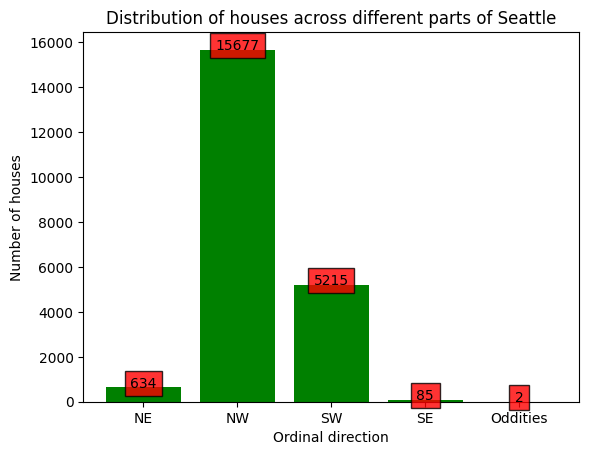

In [ ]:
middle_long = (df.long.max() + df.long.min())/2
middle_lat = (df.lat.max() + df.lat.min())/2
NW = df.loc[(df.lat >  middle_lat) & (df.long < middle_long)].id.count()
NE = df.loc[(df.lat >  middle_lat) & (df.long > middle_long)].id.count()
SW = df.loc[(df.lat <  middle_lat) & (df.long < middle_long)].id.count()
SE = df.loc[(df.lat <  middle_lat) & (df.long > middle_long)].id.count()
Oddities = df.id.count() - (NW + NE + SW + SE)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',
                 bbox = dict(facecolor = 'red', alpha =.8))
names = ['NE', 'NW', 'SW', 'SE', 'Oddities']
values = [NE, NW, SW, SE, Oddities]

plt.bar(names, values, color = "green")
addlabels(names, values)
plt.title("Distribution of houses across different parts of Seattle")
plt.xlabel("Ordinal direction")
plt.ylabel("Number of houses")
plt.show()

b)

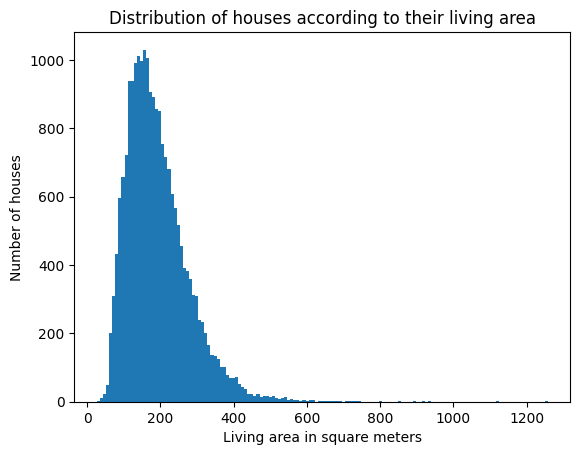

In [ ]:
plt.hist(df.sqft_living/10.76391, bins = int(math.sqrt(df.id.count())))
plt.title("Distribution of houses according to their living area")
plt.xlabel("Living area in square meters")
plt.ylabel("Number of houses")
plt.show()

c)

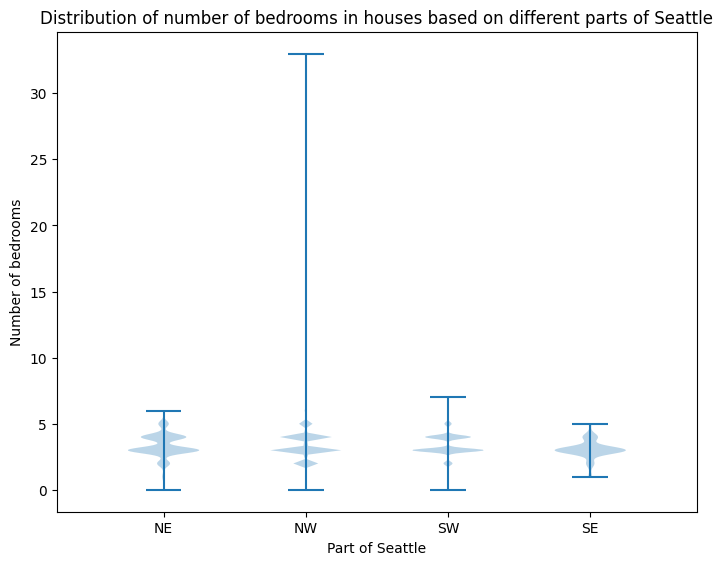

In [ ]:
middle_long = (df.long.max() + df.long.min())/2
middle_lat = (df.lat.max() + df.lat.min())/2
NW = (df.lat >  middle_lat) & (df.long < middle_long)
NE = (df.lat >  middle_lat) & (df.long > middle_long)
SW = (df.lat <  middle_lat) & (df.long < middle_long)
SE = (df.lat <  middle_lat) & (df.long > middle_long)
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Part of Seattle')

collectn_1 = df[NE].bedrooms
collectn_2 = df[NW].bedrooms
collectn_3 = df[SW].bedrooms
collectn_4 = df[SE].bedrooms

data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Distribution of number of bedrooms in houses based on different parts of Seattle')
ax.set_ylabel('Number of bedrooms')
bp = ax.violinplot(data_to_plot)
labels = ['NE', 'NW', 'SW', 'SE']
set_axis_style(ax, labels)
plt.show()